In [1]:
import csv
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
import squarify
from jupyterthemes import jtplot
jtplot.style()

In [2]:
# read in previously stored csv data file
df = pd.read_csv('twitter_data_master.csv',
                 names=[
                     'i', 'name', 'tag', 'location', 'description', 'url',
                     'followers', 'friends', 'listed', 'geo', 'coordinates',
                     'place', 'text', 'createdate', 'favorites', 'retweets',
                     'source', 'in_reply_to_status_id', 'datetime', 'm'
                 ],
                 na_values=['', 'None'],
                 header=0)

# remove geo tag variables from df
df.drop(['geo', 'coordinates', 'place'], axis=1, inplace=True)

# parse source into tuple of url and source name
df.source = df.source.map(
    lambda s: re.search(r'.*"(http.*)" .*>(.*)<.*', s).group(2))

In [3]:
# sort by followers
df = df.sort_values(by='followers', ascending=False)

In [4]:
df_unique = df.drop_duplicates('tag',
                               keep='first').dropna(subset=['description'])
df_unique
# count descriptions
# get list of English stopwords
sw = nltk.corpus.stopwords.words('english')
# construct regex pattern
pattern = re.compile('\\b({})\\W'.format('|'.join(sw)), re.I)
# remove stopwords fron string and extract words to list
df_unique.description = df_unique.description.map(lambda s: re.sub(
    pattern, '', s.lower())).map(lambda s: re.findall(r'\w+', s))
# count Frequency
wordfreq = pd.Series(df_unique.description.apply(
    pd.Series).stack()).value_counts()
print(wordfreq)

data             616
ai               441
co               376
https            286
science          247
                ... 
according          1
advocator          1
dbpedia_latam      1
same               1
chapmanu           1
Length: 10590, dtype: int64


Text(0, 0.5, 'Frequency')

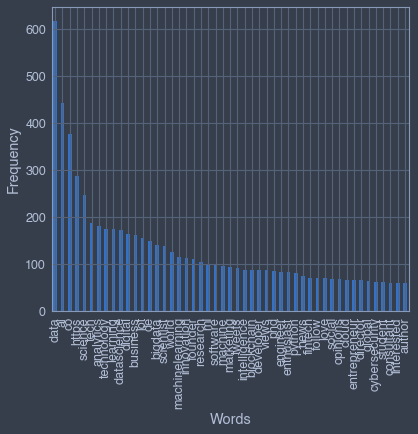

In [5]:
top50_words = wordfreq.iloc[:49]
# plot bar chart
top50_words.plot.bar()
plt.xlabel('Words')
plt.ylabel('Frequency')

In [6]:
# source Frequency
sourcefreq = pd.DataFrame(df.source.value_counts()).reset_index()
sourcefreq = sourcefreq[:9]
label = sourcefreq['index']

(0.0, 100.0, 0.0, 100.0)

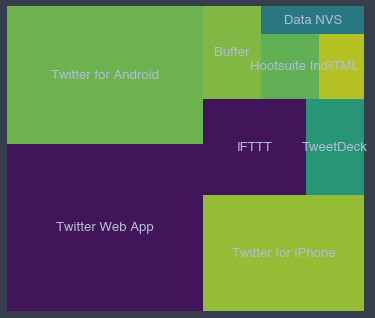

In [8]:
squarify.plot(sizes=sourcefreq['source'], label=sourcefreq['index'], alpha=.8 )
plt.axis('off')

In [ ]:
df = df.sort_values(by='retweets', ascending=False)

In [ ]:
todrop = 'RT'
df_twt = df[~df['text'].str.contains(todrop)]
df_twt

In [ ]:
!jupyter nbconvert --to script data_plot3.ipynb